In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv('artists.csv')
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
id             50 non-null int64
name           50 non-null object
years          50 non-null object
genre          50 non-null object
nationality    50 non-null object
bio            50 non-null object
wikipedia      50 non-null object
paintings      50 non-null int64
dtypes: int64(2), object(6)
memory usage: 3.2+ KB


In [9]:
df.drop(['id','bio','wikipedia'], axis=1, inplace=True)

In [10]:
df.head()

,name,years,genre,nationality,paintings
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,70
3,Claude Monet,1840 - 1926,Impressionism,French,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194


In [11]:
df_year = pd.DataFrame(df.years.str.split(' ',2).tolist(),columns = ['birth','-','death'])
df_year.drop(["-"],axis=1,inplace=True)
df["birth"]=df_year.birth
df["death"]=df_year.death
df.drop(["years"],axis=1,inplace=True)

In [12]:
df["birth"]=df["birth"].apply(lambda x: int(x))
df["death"]=df["death"].apply(lambda x: int(x))

In [13]:
df["age"]=df.death-df.birth

In [14]:
df.age.describe()

count    50.00000
mean     64.78000
std      16.74087
min      32.00000
25%      55.25000
50%      65.50000
75%      77.50000
max      98.00000
Name: age, dtype: float64

In [15]:
df['age']=df['age']
bins=[30,55,65,77,98]
labels=["young adult","early adult","adult","senior"]
df['age_group']=pd.cut(df['age'],bins,labels=labels)

In [16]:
df = df.sort_values(by=["age"], ascending=False)
df['rank']=tuple(zip(df.age))
df['rank']=df.groupby('age',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.drop(["rank"],axis=1,inplace=True)
df.reset_index(inplace=True,drop=True)
df.head()

,name,genre,nationality,paintings,birth,death,age,age_group
0,Marc Chagall,Primitivism,"French,Jewish,Belarusian",239,1887,1985,98,senior
1,Pablo Picasso,Cubism,Spanish,439,1881,1973,92,senior
2,Joan Miro,Surrealism,Spanish,102,1893,1983,90,senior
3,Michelangelo,High Renaissance,Italian,49,1475,1564,89,senior
4,Titian,"High Renaissance,Mannerism",Italian,255,1488,1576,88,senior


## Artist Nationality Distribution

No handles with labels found to put in legend.


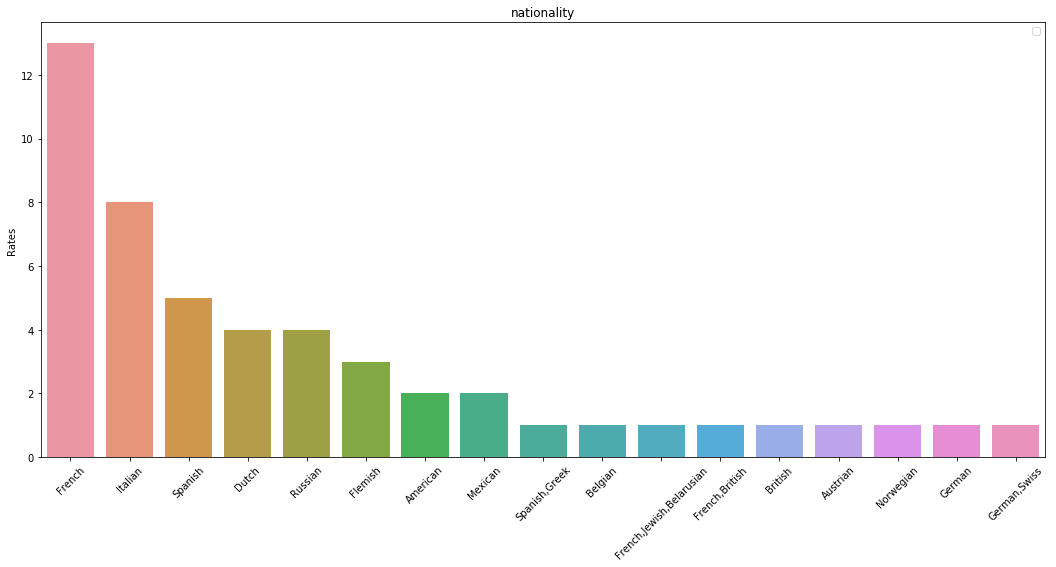

In [19]:
plt.figure(figsize=(18,8))
sns.barplot(x=df['nationality'].value_counts().index,y=df['nationality'].value_counts().values)
plt.title('nationality')
plt.xticks(rotation=45)
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()

## Genre Distribution

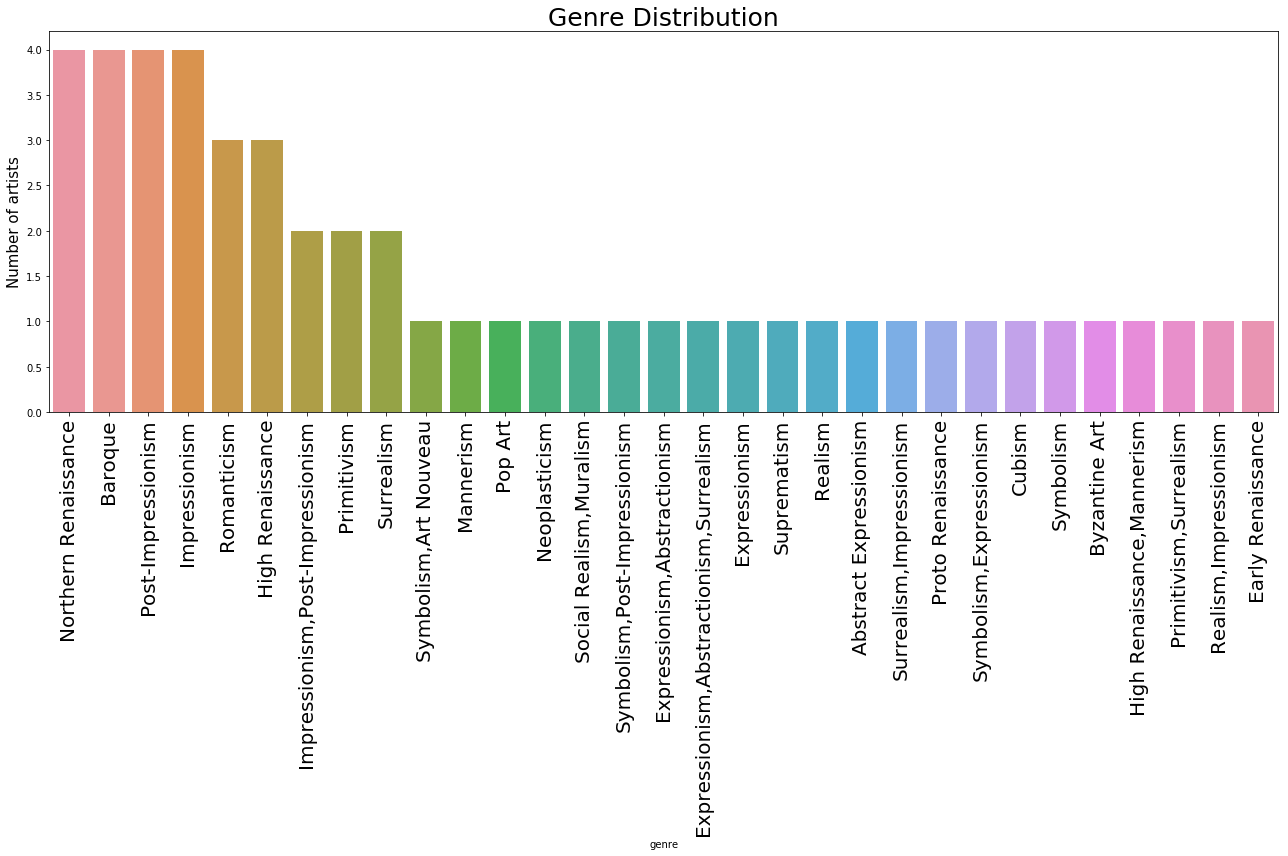

In [33]:
plt.figure(figsize=(18,12))
sns.barplot(x=df['genre'].value_counts().index,
              y=df['genre'].value_counts().values)
plt.xlabel('genre')
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('Number of artists', fontsize=15)
plt.title('Genre Distribution', fontsize=25)
plt.tight_layout()
plt.show()

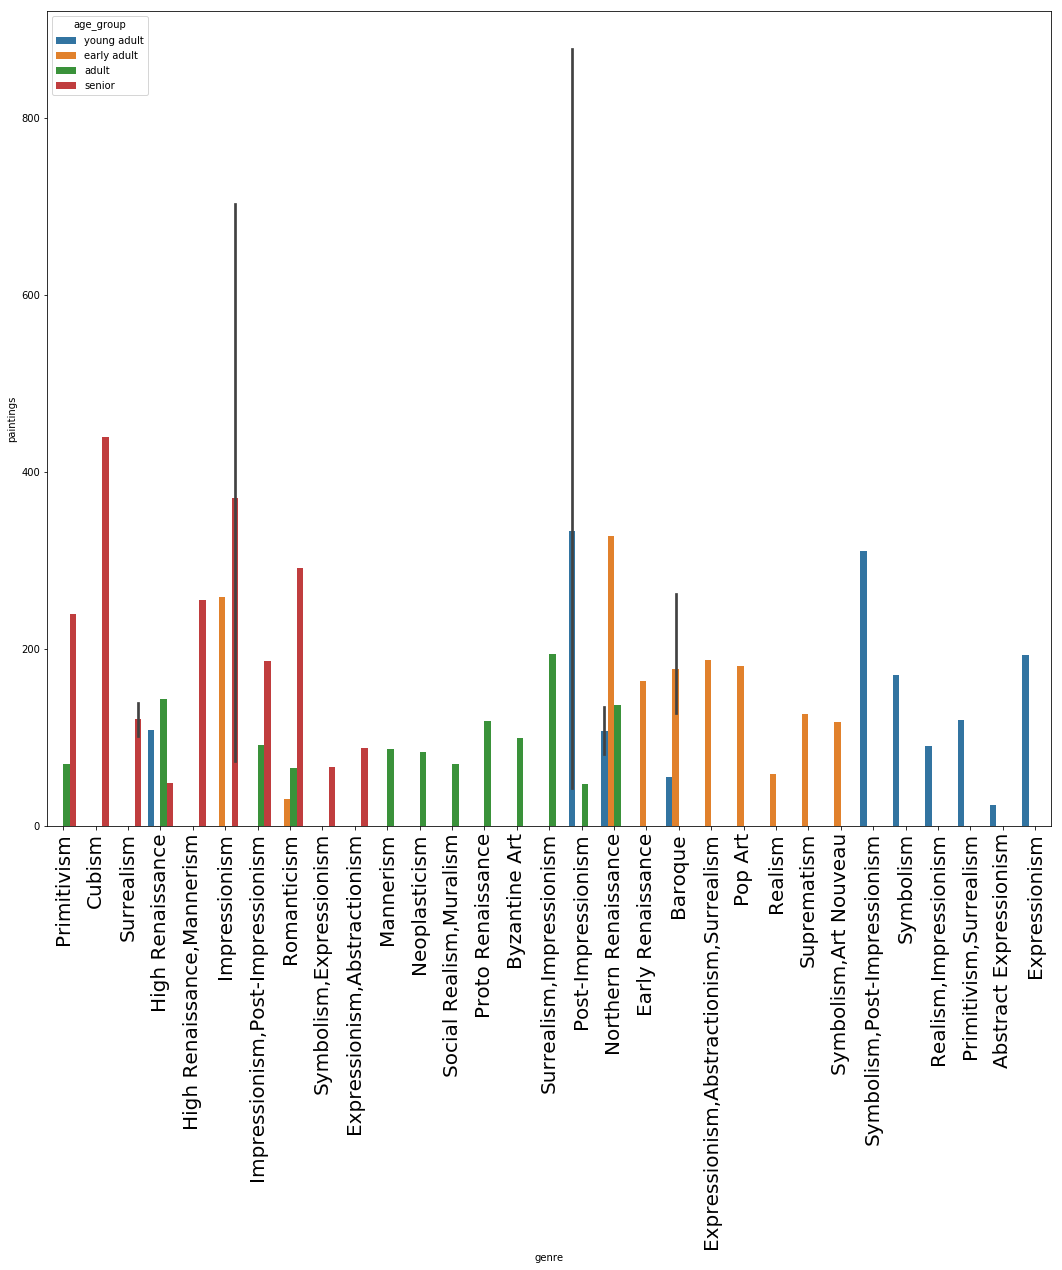

In [34]:
plt.figure(figsize=(18,15))
sns.barplot(x = "genre", y = "paintings", hue = "age_group", data = df)
plt.xticks(rotation=90, fontsize=20)
plt.show()

## Artworks Distribution By Age Group

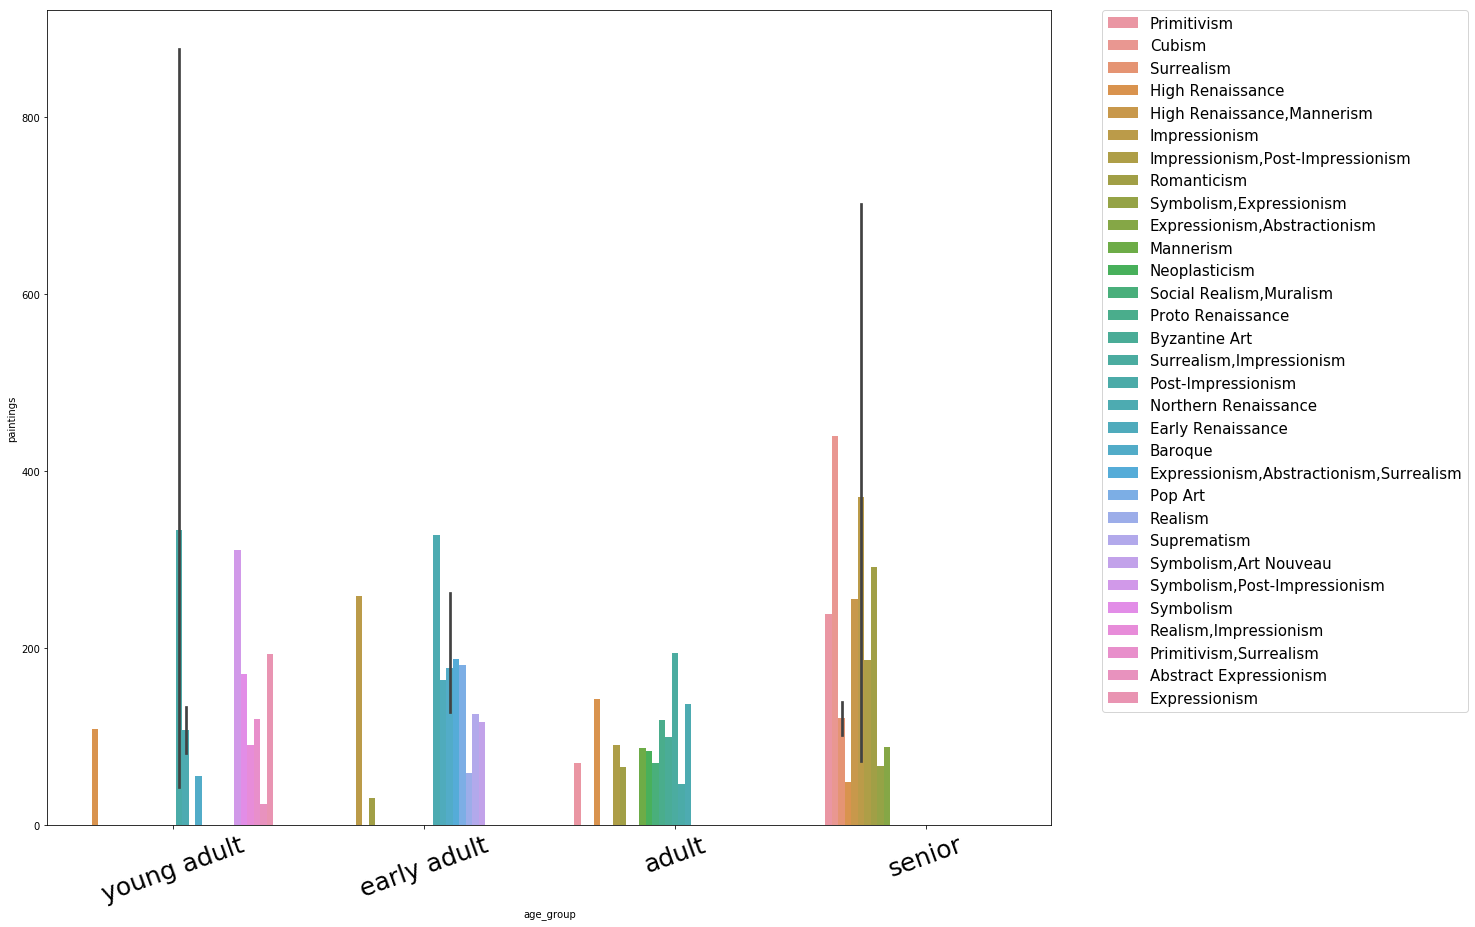

In [37]:
plt.figure(figsize=(18,15))
sns.barplot(x = "age_group", y = "paintings", hue = "genre", data = df)
plt.xticks(rotation=20,fontsize=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='below', borderaxespad=0., fontsize=15)
plt.show()

## Age Group Distribution

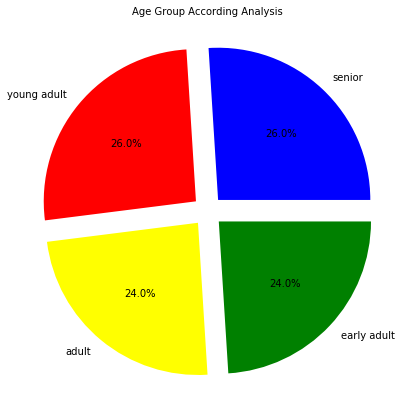

In [39]:
labels=df['age_group'].value_counts().index
colors=['blue','red','yellow','green']
explode=[0.1,0.1,0.1,0.1,]
values=df['age_group'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Age Group According Analysis',color='black',fontsize=10)
plt.show()

## Artwork Number Distribution by Age

<Figure size 1080x504 with 0 Axes>

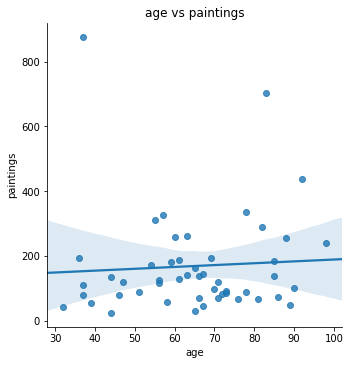

In [40]:
plt.figure(figsize=(15,7))
sns.lmplot(x='age',y='paintings',data=df)
plt.xlabel('age')
plt.ylabel('paintings')
plt.title('age vs paintings')
plt.show()